In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('BankChurners.csv')

In [3]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

<Axes: xlabel='Customer_Age', ylabel='Count'>

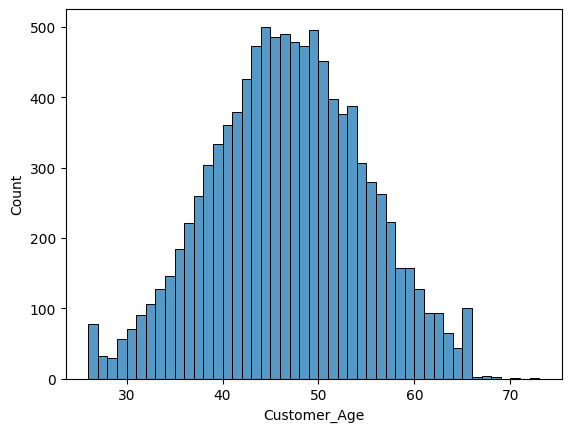

In [4]:
import seaborn as sns
sns.histplot(data['Customer_Age'])

<Axes: xlabel='count', ylabel='Education_Level'>

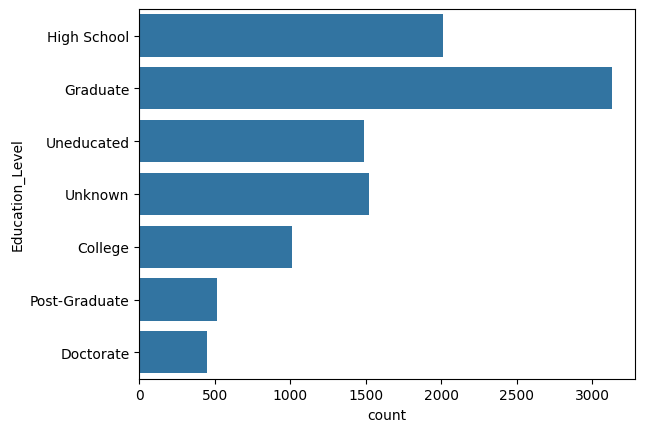

In [5]:
sns.countplot(data['Education_Level'])

<Axes: xlabel='count', ylabel='Attrition_Flag'>

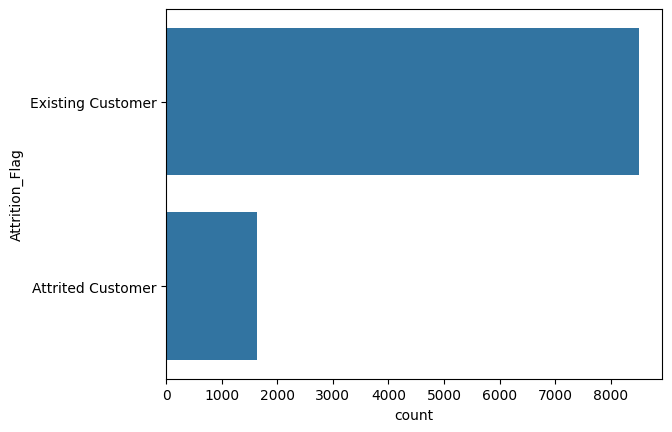

In [6]:
sns.countplot(data.Attrition_Flag)

<Axes: xlabel='Education_Level', ylabel='count'>

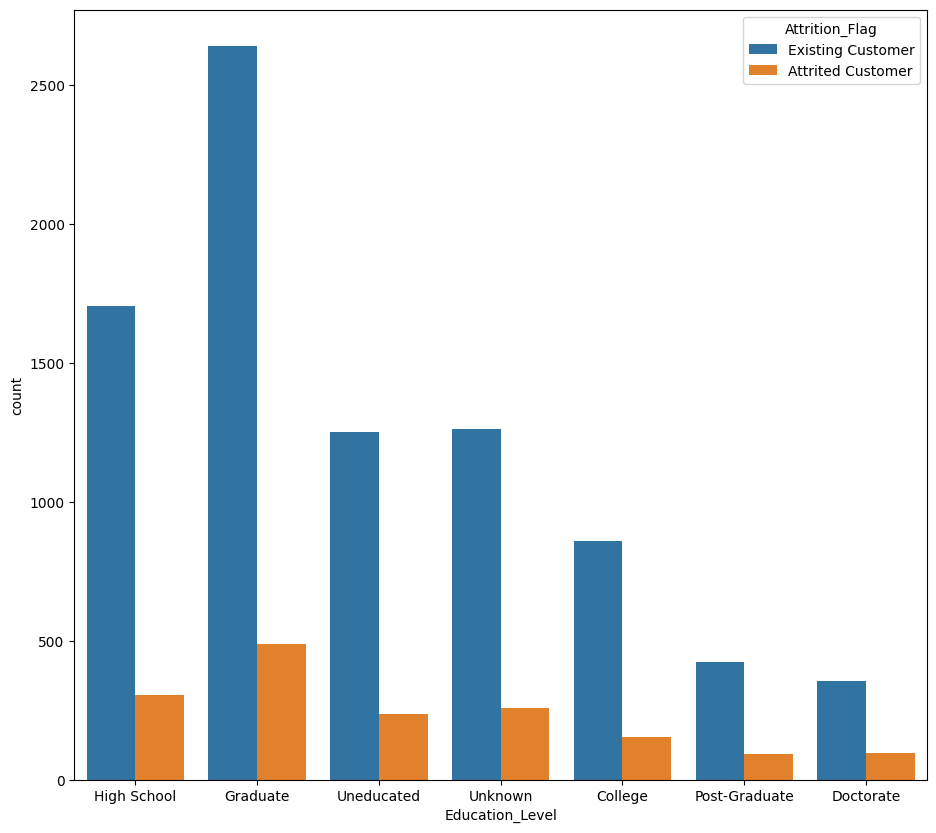

In [7]:
plt.figure(figsize=(11,10))
sns.countplot(data=data, x='Education_Level', hue='Attrition_Flag')


<Axes: xlabel='Marital_Status', ylabel='count'>

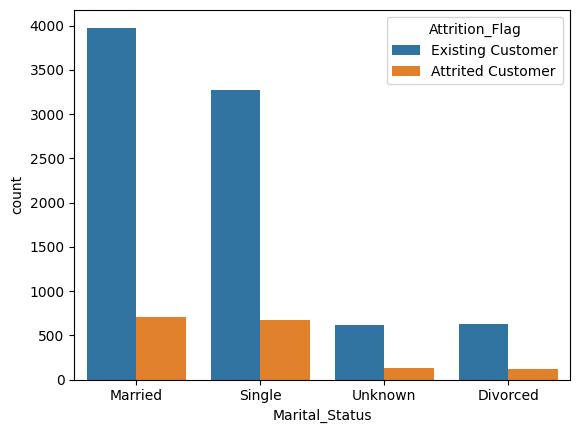

In [8]:
sns.countplot(data=data ,x='Marital_Status', hue= 'Attrition_Flag')

<Axes: xlabel='Gender', ylabel='count'>

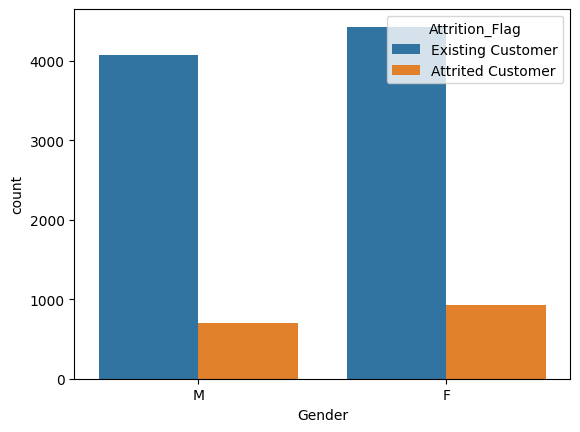

In [9]:
sns.countplot(data= data, x= 'Gender', hue='Attrition_Flag')

<Axes: xlabel='Education_Level', ylabel='Credit_Limit'>

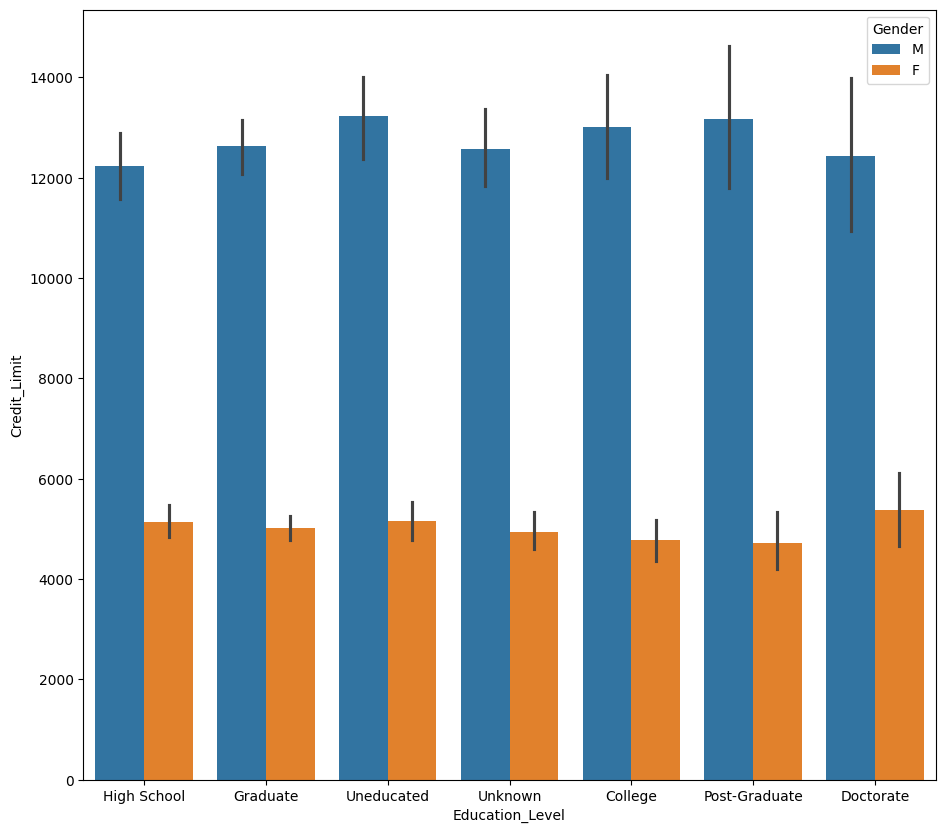

In [10]:
plt.figure(figsize=(11,10))
sns.barplot(data= data, x='Education_Level', y= 'Credit_Limit', hue= 'Gender')

In [11]:
data.Gender.value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

<Axes: ylabel='Credit_Limit'>

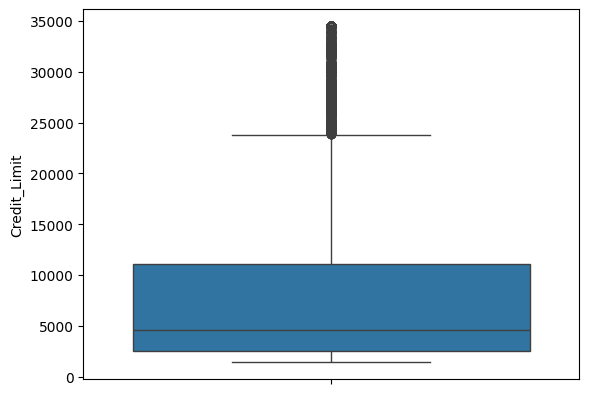

In [12]:
sns.boxplot(data['Credit_Limit'])

<Axes: ylabel='Customer_Age'>

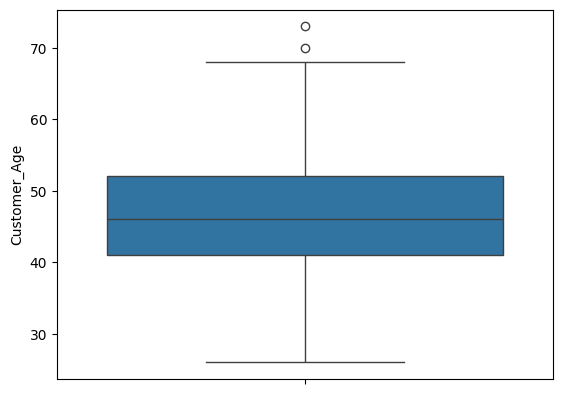

In [13]:
sns.boxplot(data['Customer_Age'])


<Axes: ylabel='Dependent_count'>

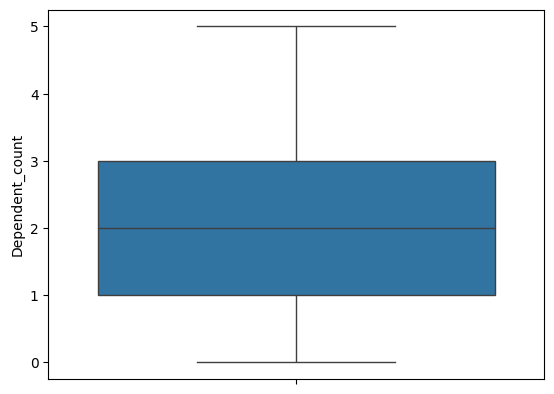

In [14]:
sns.boxplot(data['Dependent_count'])


<Axes: >

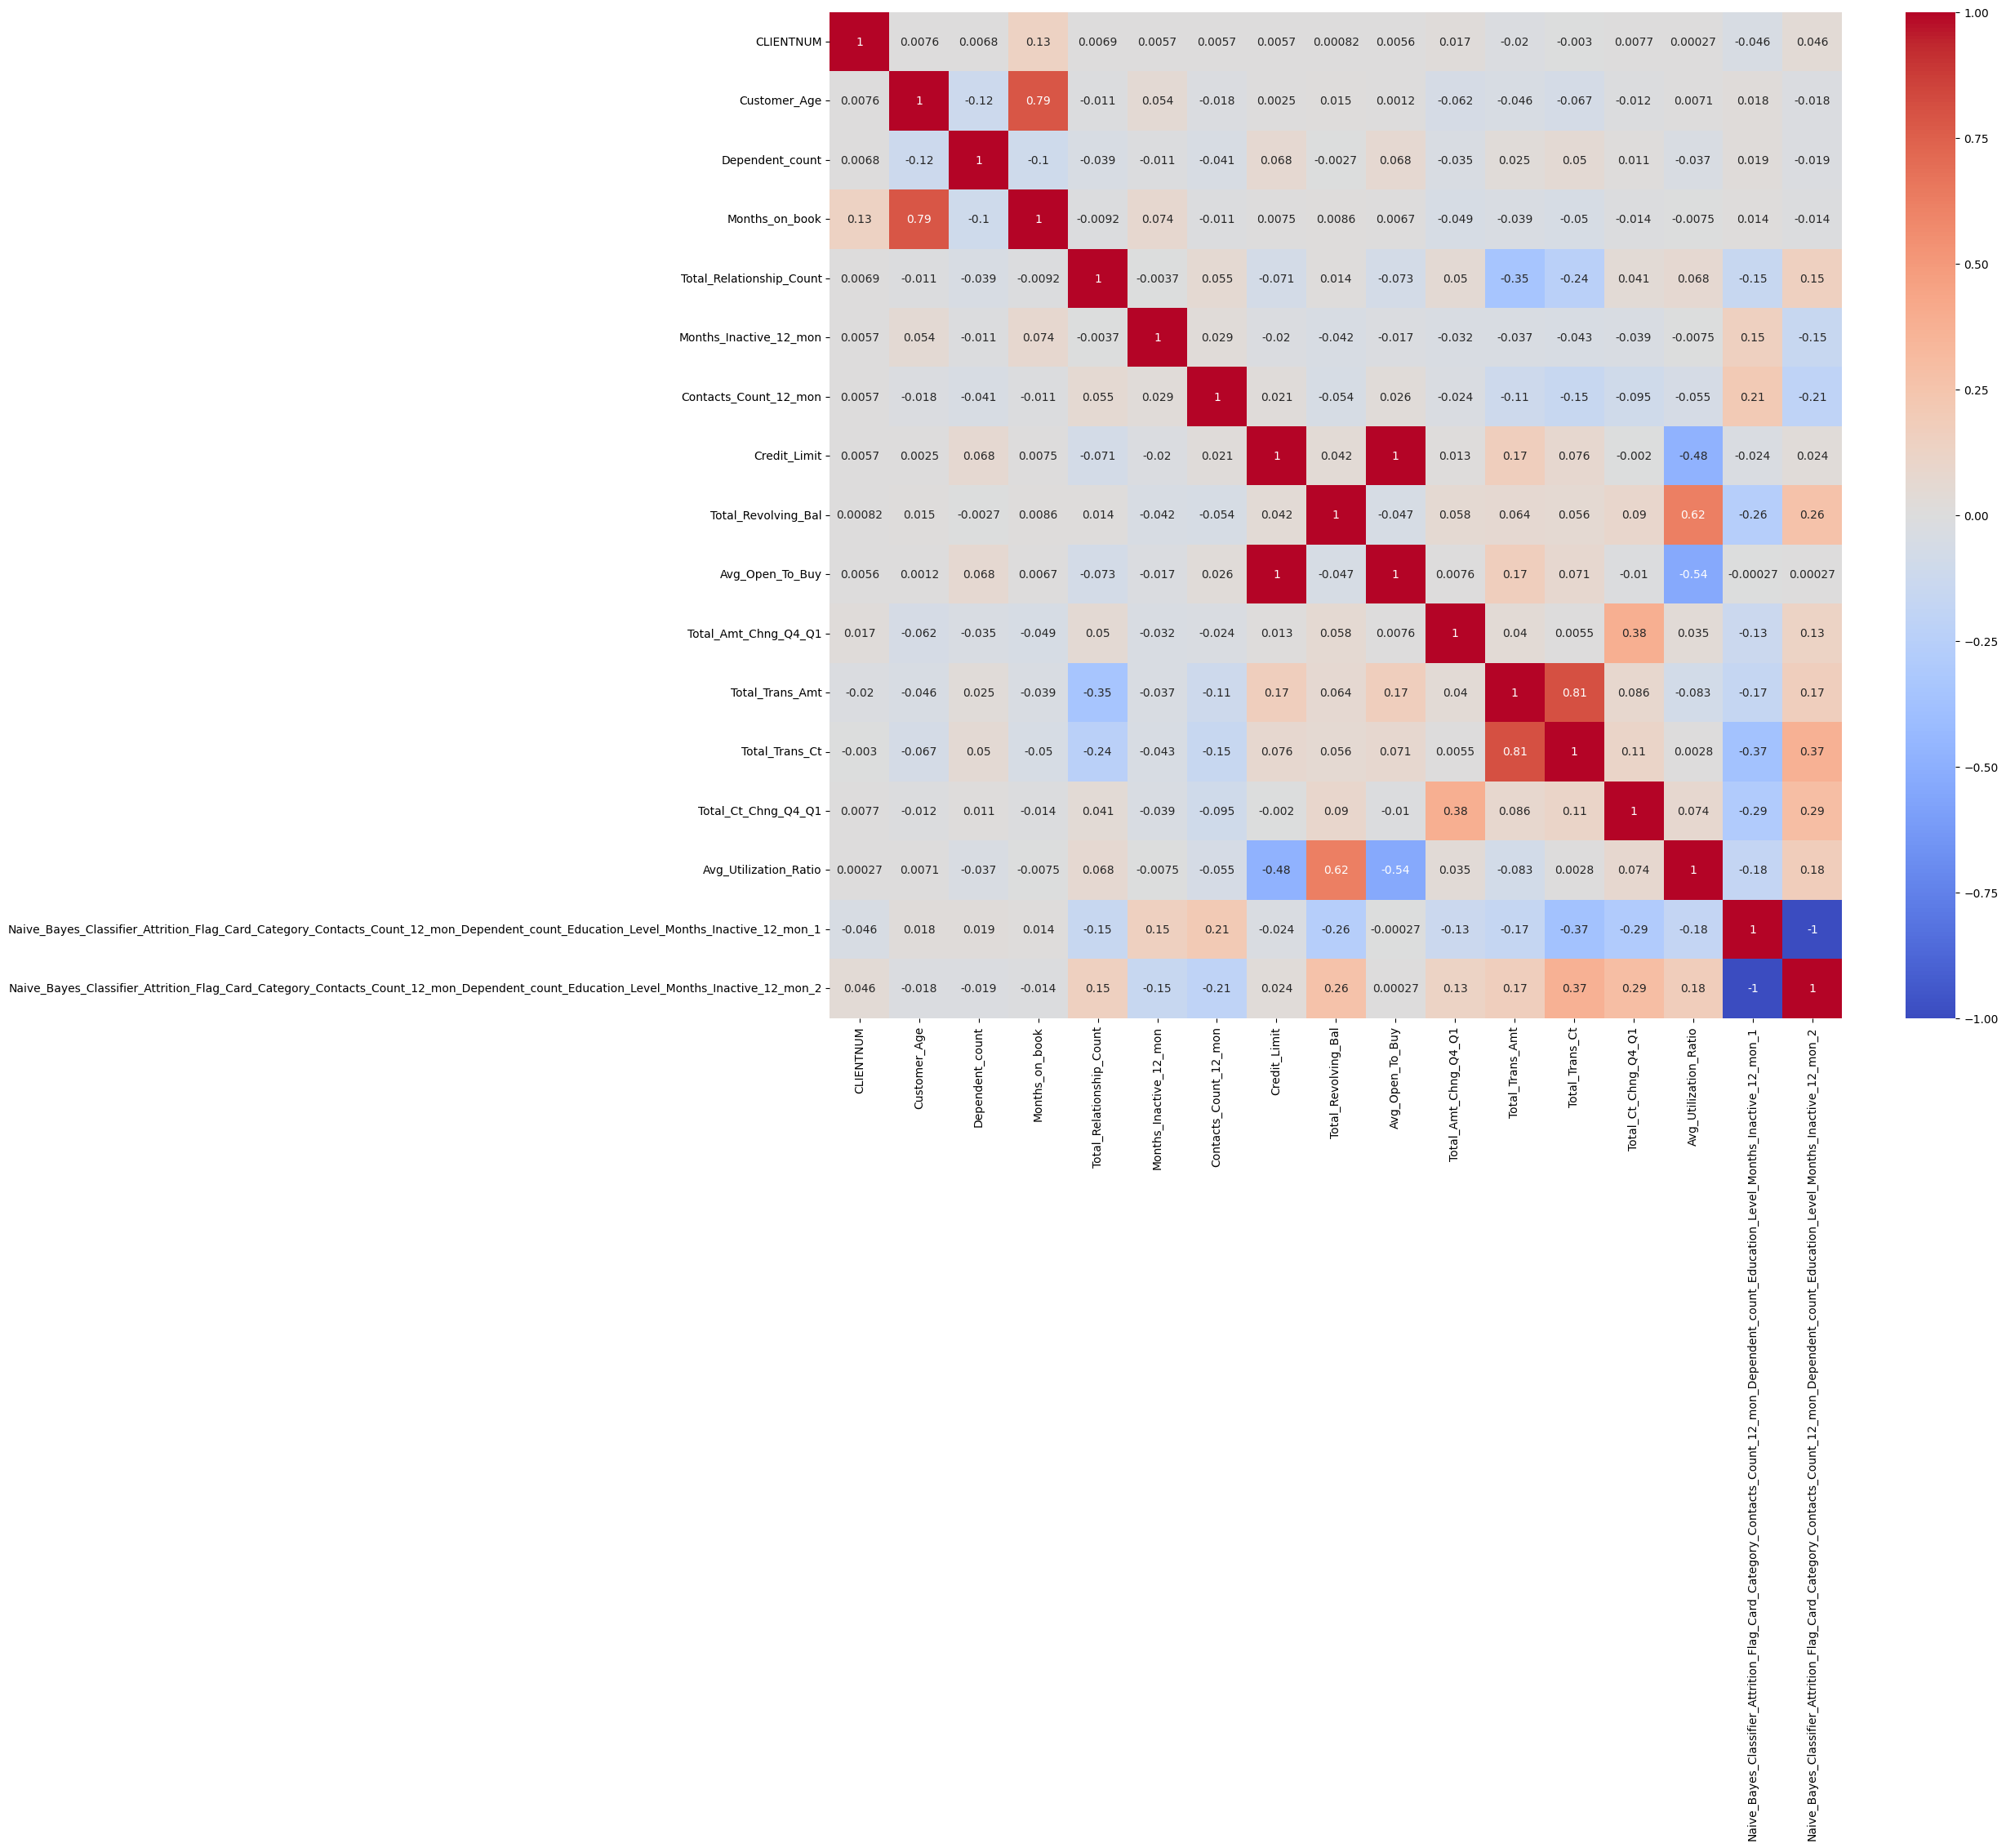

In [15]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(method='pearson',numeric_only=True), annot= True, cmap= 'coolwarm')

### High Correlation
* `Total_Trans_Ct` vs `Total_Trans_Amount` -> **_0.81_**
* `Avg_Open_To_Buy` vs `Credit_Limit` -> **_1_**
* `Months_On_Book` vs `Customer_Age` -> **_0.79_**

In [4]:
cols = data.select_dtypes(include=np.number).columns.tolist()

In [ ]:
def get_highly_correlated_features(new, threshold=0.8):
    """
    Find pairs of features with correlation higher than a given threshold.
    
    Parameters:
        new (pd.DataFrame): The dataset.
        threshold (float): Correlation threshold (absolute value).
        
    Returns:
        List of tuples: [(feature1, feature2, correlation), ...]
    """
    corr_matrix = new.corr().abs()  # absolute correlations
    high_corr_pairs = []

    # Iterate over upper triangle (to avoid duplicates & self-correlations)
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))
    
    return high_corr_pairs

get_highly_correlated_features(data[cols], threshold=0.7)

[('Customer_Age', 'Months_on_book', np.float64(0.7889123589930508)),
 ('Credit_Limit', 'Avg_Open_To_Buy', np.float64(0.995980543932001)),
 ('Total_Trans_Amt', 'Total_Trans_Ct', np.float64(0.8071920346514367)),
 ('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
  np.float64(0.9999999999689079))]

In [6]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [9]:
new = data.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
    'Total_Trans_Amt', 'Avg_Open_To_Buy', 'Months_on_book'
])

In [10]:
new.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,777,1.335,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,8256.0,864,1.541,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,3418.0,0,2.594,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,4,1,3313.0,2517,1.405,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,4716.0,0,2.175,28,2.500,0.000


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ----------------------------
# Features and Target
# ----------------------------
target = "Attrition_Flag"

categorical_ohe = ["Gender", "Education_Level", "Marital_Status", "Card_Category"]
categorical_ordinal = ["Income_Category"]
numeric_features = [
    "Customer_Age", "Dependent_count", "Total_Relationship_Count",
    "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit",
    "Total_Revolving_Bal", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"
]

# ----------------------------
# Preprocessing
# ----------------------------
# One-hot encoding
ohe_encoder = OneHotEncoder(handle_unknown="ignore")

# Ordinal encoding: define an order for Income_Category
# Adjust order according to business logic / dataset
income_order = [["Less than $40K", "$40K - $60K", "$60K - $80K",
                 "$80K - $120K", "$120K +", "Unknown"]]

ordinal_encoder = OrdinalEncoder(categories=income_order)

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", ohe_encoder, categorical_ohe),
        ("ordinal", ordinal_encoder, categorical_ordinal),
        ("scaler", StandardScaler(), numeric_features)
    ]
)

# ----------------------------
# Pipeline (with SMOTE)
# ----------------------------
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LogisticRegression(max_iter=1000, solver="lbfgs"))
])

# ----------------------------
# Example train-test split
# ----------------------------
# new = pd.read_csv("your_data.csv")  # load data
X = new.drop(columns=[target])
y = new[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y,
                                                    random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Evaluate
print("Train score:", pipeline.score(X_train, y_train))
print("Test score:", pipeline.score(X_test, y_test))


Train score: 0.8392791013455129
Test score: 0.8257650542941757


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ----------------------------
# Features and Target
# ----------------------------
target = "Attrition_Flag"

categorical_ohe = ["Gender", "Education_Level", "Marital_Status", "Card_Category"]
categorical_ordinal = ["Income_Category"]
numeric_features = [
    "Customer_Age", "Dependent_count", "Total_Relationship_Count",
    "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit",
    "Total_Revolving_Bal", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"
]

# ----------------------------
# Preprocessing
# ----------------------------
ohe_encoder = OneHotEncoder(handle_unknown="ignore")

# Define order for Income_Category (adjust to match dataset categories)
income_order = [["Less than $40K", "$40K - $60K", "$60K - $80K",
                 "$80K - $120K", "$120K +", "Unknown"]]
ordinal_encoder = OrdinalEncoder(categories=income_order)

preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", ohe_encoder, categorical_ohe),
        ("ordinal", ordinal_encoder, categorical_ordinal),
        # Scaling is optional for RF but kept for consistency
        ("scaler", StandardScaler(), numeric_features)
    ]
)

# ----------------------------
# Pipeline with RandomForest
# ----------------------------
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42))
])

# ----------------------------
# Hyperparameter Grid
# ----------------------------
param_grid = {
    "classifier__n_estimators": [100, 200, 500],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", "log2"]
}

# ----------------------------
# Grid Search
# ----------------------------
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="roc_auc",   # better for imbalanced churn
    cv=5,
    n_jobs=-1,
    verbose=2
)

# ----------------------------
# Example train-test split
# ----------------------------
# new = pd.read_csv("your_data.csv")
X = new.drop(columns=[target])
y = new[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit search
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)
print("Test ROC-AUC:", grid_search.score(X_test, y_test))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Params: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 500}
Best CV ROC-AUC: 0.9585188361592654
Test ROC-AUC: 0.9641278885723329


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.81      0.76      0.78       325
Existing Customer       0.95      0.97      0.96      1701

         accuracy                           0.93      2026
        macro avg       0.88      0.86      0.87      2026
     weighted avg       0.93      0.93      0.93      2026



In [23]:
print(confusion_matrix(y_test, y_pred))


[[ 246   79]
 [  56 1645]]


In [ ]:
import joblib

# Save the best estimator from grid_search (RandomForest pipeline)
joblib.dump(grid_search.best_estimator_, "randomforest_churn_model.pkl")

NameError: name 'grid_search' is not defined